In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import pandas as pd
file_path = '/content/drive/My Drive/LUSCexpfile.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

/tmp/ipython-input-1499633562.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

,Unnamed: 0,03611591-08da-45c5-bfe5-ce511a2cc341,045e2535-012c-4cec-b386-9d6f62b91829,118933b6-86c7-4668-9973-424ece352a60,153cb1b1-774c-4e65-b209-6a462b68cfc5,18f0b34c-d2f6-4746-b450-8ed3def9e334,1ea50a97-2adb-4252-aec8-2fe94d49b0a0,29b6e624-9539-4abc-b80f-b5c7b65948fc,306df79f-3f2c-4631-b527-7d79336bc573,378d4b61-b44c-4aed-86e9-be63913aaf66,...,fb97b7ac-e36e-4b49-aa22-1ed7b5a0dd4b,fc25b410-f91e-4607-a851-f434ff628052,fcb5bf8a-5c16-48cd-84a4-2a87695eff2b,fe819208-ff01-49e0-a04a-5fb467351305,fe8a279b-cfbb-4a96-9e30-5589bddb7911,feb82116-b8c0-41e6-9afd-43cc6f6c0d62,ff47bedc-e4c7-4775-8e8e-ed4d2eecda83,ff915b5b-98f0-4cd9-8afc-90bc16529cd8,ffae8b64-70e0-4d15-819f-7d8dd0a51db0,ffb473b7-a5cf-4607-b97c-fc78b4719ccb
0,NaN,normal,normal,normal,normal,normal,normal,normal,normal,normal,...,tumor,tumor,tumor,tumor,tumor,tumor,tumor,tumor,tumor,tumor
1,A1BG,0.108403483,0.095187869,0.097042537,0.04302861,0.095016254,0.184691931,0.049553602,0.084045631,0.055256044,...,0.212273128,0.040941764,0.215710235,0.214627375,0.013129838,0.072578267,0.210407375,0.129361336,0.067741511,0.017848088
2,A1BG-AS1,1.187325638,0.594016407,1.012277195,1.015939279,1.174120262,1.830951652,0.75448563,1.125102086,0.729134459,...,1.017353161,0.304290737,1.436468418,0.615680103,0.16948915,1.145089115,1.354173806,1.128719724,0.394044479,0.187729763
3,A1CF,0.001370356,0.032045614,0,0,0,0.009064274,0.004770426,0.001460858,0,...,0,0.007763327,0.089985963,0.007308917,0.010954521,0.00137622,0.002250611,0.004497045,0.004709856,0.003722766
4,A2M,459.7836081,648.0057316,444.8724975,751.7312734,1385.150034,656.3835066,1068.335251,416.7646218,793.907885,...,29.70095721,60.37668747,210.0103015,8.883384349,46.51221702,53.39539897,22.30662803,17.18205196,120.810731,57.23277815


In [26]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,56898,56899,56900,56901,56902,56903,56904,56905,56906,56907
Unnamed: 0,NaN,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
03611591-08da-45c5-bfe5-ce511a2cc341,normal,0.108403483,1.187325638,0.001370356,459.7836081,0.486278098,0.027029014,0,0,0.084772552,...,1.665693,0.860664,2.226001,5.013749,0.00841,0.0,4.194418,99.369159,0.0,4.552543
045e2535-012c-4cec-b386-9d6f62b91829,normal,0.095187869,0.594016407,0.032045614,648.0057316,1.080389631,0.055878692,0.029601196,0,0.04022254,...,1.358792,1.232901,3.272293,5.482293,0.025654,0.0,4.662835,98.084795,0.0,5.626856
118933b6-86c7-4668-9973-424ece352a60,normal,0.097042537,1.012277195,0,444.8724975,1.047980517,0.012098154,0,0,0.178337234,...,2.645383,0.72607,1.60696,2.783768,0.037645,0.0,4.619178,54.605189,0.0,2.309259
153cb1b1-774c-4e65-b209-6a462b68cfc5,normal,0.04302861,1.015939279,0,751.7312734,0.780322401,0.021787373,0.029335026,0.03435086,0.082568933,...,2.286109,0.844632,2.43637,4.161483,0.042371,0.0,4.814995,86.273891,0.0,5.302771


In [27]:
df.columns = df.iloc[0]
df = df[1:]
df = df.rename(columns = {np.nan:'Class'})
df.columns.name = None
df.head()

,Class,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
03611591-08da-45c5-bfe5-ce511a2cc341,normal,0.108403483,1.187325638,0.001370356,459.7836081,0.486278098,0.027029014,0,0,0.084772552,...,1.665693,0.860664,2.226001,5.013749,0.00841,0.0,4.194418,99.369159,0.0,4.552543
045e2535-012c-4cec-b386-9d6f62b91829,normal,0.095187869,0.594016407,0.032045614,648.0057316,1.080389631,0.055878692,0.029601196,0,0.04022254,...,1.358792,1.232901,3.272293,5.482293,0.025654,0.0,4.662835,98.084795,0.0,5.626856
118933b6-86c7-4668-9973-424ece352a60,normal,0.097042537,1.012277195,0,444.8724975,1.047980517,0.012098154,0,0,0.178337234,...,2.645383,0.72607,1.60696,2.783768,0.037645,0.0,4.619178,54.605189,0.0,2.309259
153cb1b1-774c-4e65-b209-6a462b68cfc5,normal,0.04302861,1.015939279,0,751.7312734,0.780322401,0.021787373,0.029335026,0.03435086,0.082568933,...,2.286109,0.844632,2.43637,4.161483,0.042371,0.0,4.814995,86.273891,0.0,5.302771
18f0b34c-d2f6-4746-b450-8ed3def9e334,normal,0.095016254,1.174120262,0,1385.150034,0.721304607,0.048111117,0,0,0.182329632,...,2.400978,0.854256,2.22553,4.401694,0.006238,0.0,5.432338,93.666207,0.0,5.399341


In [28]:
print("Data size: ")
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Data size: 
Rows: 551
Columns: 56908


In [29]:
df.isnull().sum().any()

np.False_

In [30]:
# Features and Labels
X = df.drop(columns=['Class']).astype(float)
y = df['Class'].map({'normal': 0, 'tumor': 1})  # Encode labels

In [31]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, stratify=y, random_state=42
)

In [32]:
# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Train SVM Classifier
svm_clf = SVC(
    kernel='rbf',       # radial basis function kernel
    probability=True,   # to allow ROC curve
    C=10,               # regularization (tune with grid search)
    gamma='scale',      # kernel coefficient
    random_state=42
)

svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_test_scaled)
y_prob = svm_clf.predict_proba(X_test_scaled)[:,1]

In [34]:
# Evaluation Metrics
print("✅ Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

✅ Model Performance:
Accuracy: 0.9896373056994818
Precision: 0.9887640449438202
Recall: 1.0
F1 Score: 0.9943502824858758
ROC AUC: 0.999331550802139


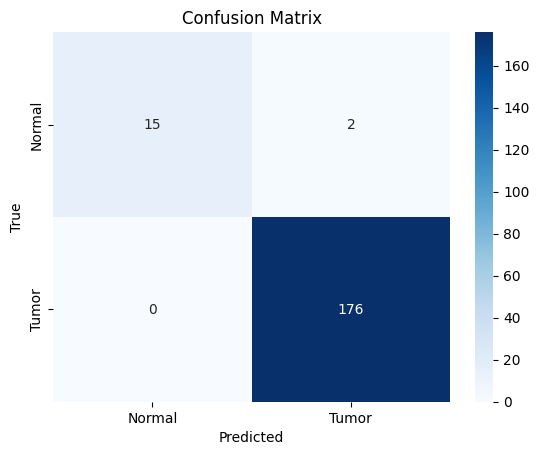

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tumor"], yticklabels=["Normal", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

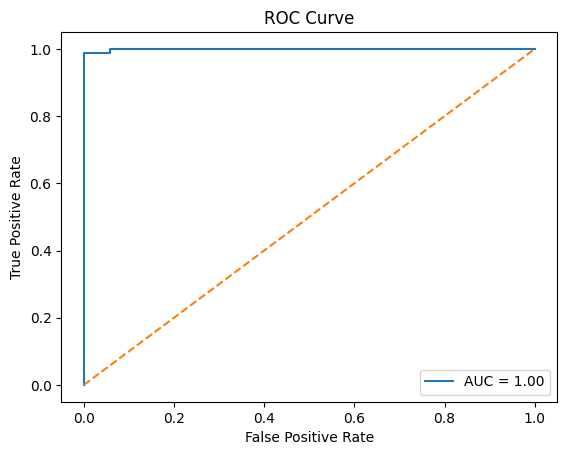

In [36]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [37]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Normal", "Tumor"]))

              precision    recall  f1-score   support

      Normal       1.00      0.88      0.94        17
       Tumor       0.99      1.00      0.99       176

    accuracy                           0.99       193
   macro avg       0.99      0.94      0.97       193
weighted avg       0.99      0.99      0.99       193



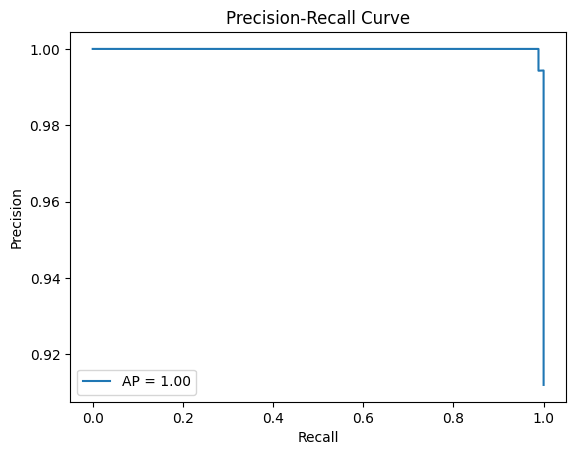

In [38]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f"AP = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

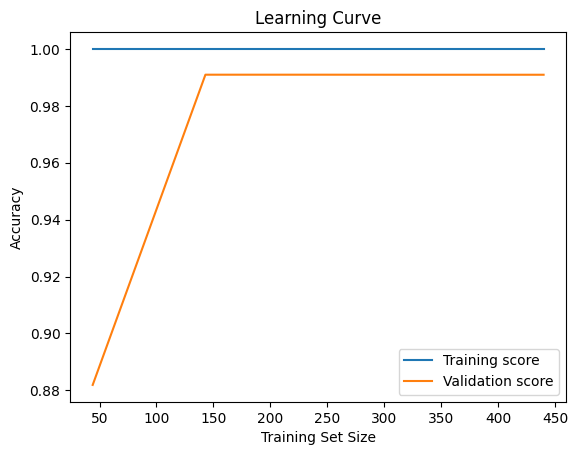

In [41]:
# Learning Curve (Bias vs Variance Check)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    svm_clf, X, y, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()